In [1]:
import PIL.ImageOps
from PIL import Image
import PIL
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../train.csv")

cancer_patients = df.loc[df['cancer'] == 1]
not_cancer_patients = df.loc[df['cancer'] == 0]

cancer_patients.head(6), not_cancer_patients.head(6)

(     site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
 87         1       10130   388811999          L  MLO  71.0       1       1   
 88         1       10130   613462606          L   CC  71.0       1       1   
 89         1       10130  1360338805          L   CC  71.0       1       1   
 90         1       10130  1672636630          L  MLO  71.0       1       1   
 190        1       10226   461614796          L  MLO  71.0       1       1   
 191        1       10226   530620473          L   CC  71.0       1       1   
 
      invasive  BIRADS  implant density  machine_id  difficult_negative_case  
 87          1     0.0        0       B          49                    False  
 88          1     0.0        0       B          49                    False  
 89          1     0.0        0       B          49                    False  
 90          1     0.0        0       B          49                    False  
 190         1     0.0        0       C          4

In [3]:
df.loc[df['patient_id'] == 442]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
31923,1,442,814892814,L,CC,51.0,0,0,0,1.0,0,B,210,False
31924,1,442,1154946809,L,MLO,51.0,0,0,0,1.0,0,B,210,False
31925,1,442,778322281,R,CC,51.0,0,0,0,1.0,0,B,210,False
31926,1,442,1337197314,R,MLO,51.0,0,0,0,1.0,0,B,210,False


In [69]:
cpatients = cancer_patients.sort_values(by='age', ascending=True)
cpatients = cpatients.loc[cpatients['laterality'] == 'L']
cpatients_no_implant = cpatients.loc[cpatients['implant'] == 0]
cpatients_implant = cpatients.loc[cpatients['implant'] == 1]

cpatients = pd.concat([cpatients_no_implant.head(3), cpatients_implant.head(3)])

patients = not_cancer_patients.sort_values(by='age', ascending=True)
patients = patients.loc[patients['laterality'] == 'L']
patients_no_implant = patients.loc[patients['implant'] == 0]
patients_implant = patients.loc[patients['implant'] == 1]

patients = pd.concat([patients_no_implant.head(3), patients_implant.head(3)])

len(cpatients), len(patients)

(6, 6)

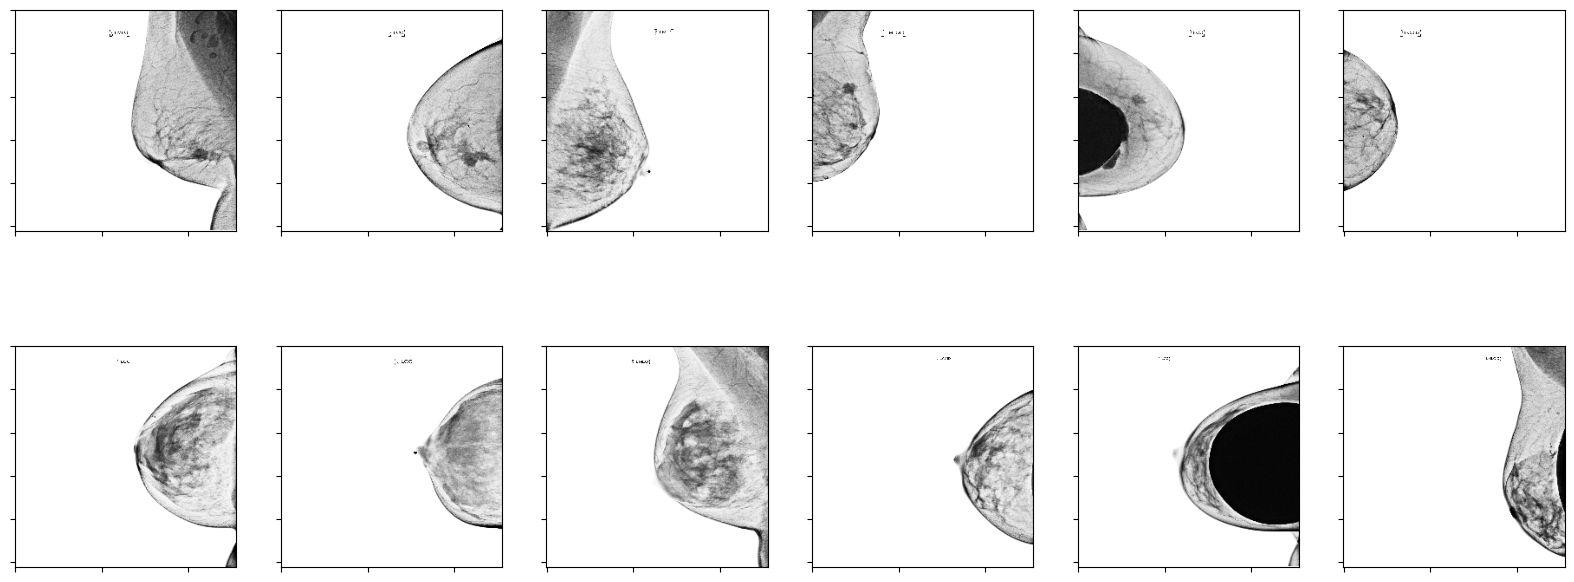

In [71]:
_, ax = plt.subplots(2, 6, figsize=(20, 8))

im_idx = 0
for idx, row in cpatients.iterrows():
    image = Image.open(f"../data/rsna_breast_cancer/{row['patient_id']}_{row['image_id']}.png")
    image = PIL.ImageOps.invert(image)
    ax[0, im_idx].imshow(np.array(image), cmap='gray')
    ax[0, im_idx].set_yticklabels([])
    ax[0, im_idx].set_xticklabels([])
    im_idx += 1

im_idx = 0
for idx, row in patients.iterrows():
    image = Image.open(f"../data/rsna_breast_cancer/{row['patient_id']}_{row['image_id']}.png")
    image = PIL.ImageOps.invert(image)
    ax[1, im_idx].imshow(np.array(image), cmap='gray')
    ax[1, im_idx].set_yticklabels([])
    ax[1, im_idx].set_xticklabels([])
    im_idx += 1

plt.show()